In [132]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [133]:
def mode(x):
    return stats.mode(x)[0][0]

In [134]:
# Load orders in which results appeared to users

orders_df = pd.read_csv('./result_ids_test_order.csv', sep=',')
orders_df

,result ID,sum of rates,order,test order
0,S-EPMC6040727,12,random,1
1,Mendeley_pzp26k9fy7,14,random,2
2,DRYAD_doi.org:10.5061:dryad.9r35r,22,random,3
3,veupathdb_DS_e8c4cf2187,11,random,4
4,Dataverse_10.5064_F6SF2T3N,13,random,5
...,...,...,...,...
476,ZENODO_5044544,13,random,9
477,ZENODO_5008681,17,random,10
478,S-EPMC6256666,17,random,11
479,IMMPORT_SDY1515_2,19,least to most,4


In [135]:
# Drop unneeded columns

orders_df.drop(columns = ['sum of rates', 'order'], inplace = True)
orders_df

,result ID,test order
0,S-EPMC6040727,1
1,Mendeley_pzp26k9fy7,2
2,DRYAD_doi.org:10.5061:dryad.9r35r,3
3,veupathdb_DS_e8c4cf2187,4
4,Dataverse_10.5064_F6SF2T3N,5
...,...,...
476,ZENODO_5044544,9
477,ZENODO_5008681,10
478,S-EPMC6256666,11
479,IMMPORT_SDY1515_2,4


In [136]:
orders_df.rename(columns = {'result ID': 'result id'}, inplace = True)
orders_df

,result id,test order
0,S-EPMC6040727,1
1,Mendeley_pzp26k9fy7,2
2,DRYAD_doi.org:10.5061:dryad.9r35r,3
3,veupathdb_DS_e8c4cf2187,4
4,Dataverse_10.5064_F6SF2T3N,5
...,...,...
476,ZENODO_5044544,9
477,ZENODO_5008681,10
478,S-EPMC6256666,11
479,IMMPORT_SDY1515_2,4


In [137]:
ranked_df = pd.read_csv('./ranked_analysis_revisited.csv', sep=',')
ranked_df

,result id,original query,combi 1,combi 2,combi 3,combi 4,combi 5,combi 6,combi 7,combi 8,combi 9,combi 10,combi 11,combi 12,combi 13,combi 14,combi 15
0,S-EPMC6040727,1.5,1.333333,1.333333,1.2,0.000000,0.000000,1.333333,1.333333,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
1,Mendeley_pzp26k9fy7,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.400000,1.400000,0.000000,0.0,0.0,0.000000,0.000000
2,DRYAD_doi.org:10.5061:dryad.9r35r,0.0,0.000000,3.666667,11.0,22.000000,11.000000,0.000000,7.333333,22.0,22.000000,22.000000,2.444444,11.0,22.0,22.000000,22.000000
3,veupathdb_DS_e8c4cf2187,0.0,0.000000,0.000000,0.0,2.200000,3.666667,0.000000,0.000000,0.0,1.833333,3.666667,0.000000,0.0,0.0,0.000000,1.100000
4,Dataverse_10.5064_F6SF2T3N,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.857143,2.166667,0.000000,0.0,0.0,2.600000,4.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,ZENODO_5044544,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,1.300000,1.625000
477,ZENODO_5008681,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.700000
478,S-EPMC6256666,1.7,1.700000,0.000000,0.0,0.000000,0.000000,1.700000,0.000000,0.0,0.000000,0.000000,1.700000,0.0,0.0,0.000000,0.000000
479,IMMPORT_SDY1515_2,0.0,0.000000,0.000000,0.0,6.333333,9.500000,0.000000,0.000000,0.0,3.800000,9.500000,0.000000,0.0,0.0,2.375000,3.800000


In [138]:
# Add order info to ranked analysis data

ranked_df = ranked_df.merge(orders_df[['result id', 'test order']], 
                            how = 'left', on = 'result id').copy()
ranked_df

,result id,original query,combi 1,combi 2,combi 3,combi 4,combi 5,combi 6,combi 7,combi 8,combi 9,combi 10,combi 11,combi 12,combi 13,combi 14,combi 15,test order
0,S-EPMC6040727,1.5,1.333333,1.333333,1.2,0.000000,0.000000,1.333333,1.333333,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1
1,Mendeley_pzp26k9fy7,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.400000,1.400000,0.000000,0.0,0.0,0.000000,0.000000,2
2,DRYAD_doi.org:10.5061:dryad.9r35r,0.0,0.000000,3.666667,11.0,22.000000,11.000000,0.000000,7.333333,22.0,22.000000,22.000000,2.444444,11.0,22.0,22.000000,22.000000,3
3,veupathdb_DS_e8c4cf2187,0.0,0.000000,0.000000,0.0,2.200000,3.666667,0.000000,0.000000,0.0,1.833333,3.666667,0.000000,0.0,0.0,0.000000,1.100000,4
4,Dataverse_10.5064_F6SF2T3N,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.857143,2.166667,0.000000,0.0,0.0,2.600000,4.333333,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,ZENODO_5044544,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,1.300000,1.625000,9
477,ZENODO_5008681,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.700000,10
478,S-EPMC6256666,1.7,1.700000,0.000000,0.0,0.000000,0.000000,1.700000,0.000000,0.0,0.000000,0.000000,1.700000,0.0,0.0,0.000000,0.000000,11
479,IMMPORT_SDY1515_2,0.0,0.000000,0.000000,0.0,6.333333,9.500000,0.000000,0.000000,0.0,3.800000,9.500000,0.000000,0.0,0.0,2.375000,3.800000,4


In [139]:
ranked_df.rename(columns = {'original query': 'original', 'combi 1': 'c1', 'combi 2': 'c2', 'combi 3': 'c3',
                            'combi 4': 'c4', 'combi 5': 'c5', 'combi 6': 'c6', 'combi 7': 'c7', 
                            'combi 8': 'c8', 'combi 9': 'c9', 'combi 10': 'c10', 'combi 11': 'c11', 
                            'combi 12': 'c12', 'combi 13': 'c13', 'combi 14': 'c14', 'combi 15': 'c15'
                           }, inplace = True)

In [140]:
ranked_df_melted = pd.melt(ranked_df, id_vars = ['result id', 'test order'], 
                    value_vars = ['original', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9',
                                  'c10', 'c11', 'c12', 'c13', 'c14', 'c15'],
                    var_name = 'combination', value_name = 'score')

In [141]:
ranked_df_filtered = ranked_df_melted[ranked_df_melted['score'] != 0]

# Scores by test order

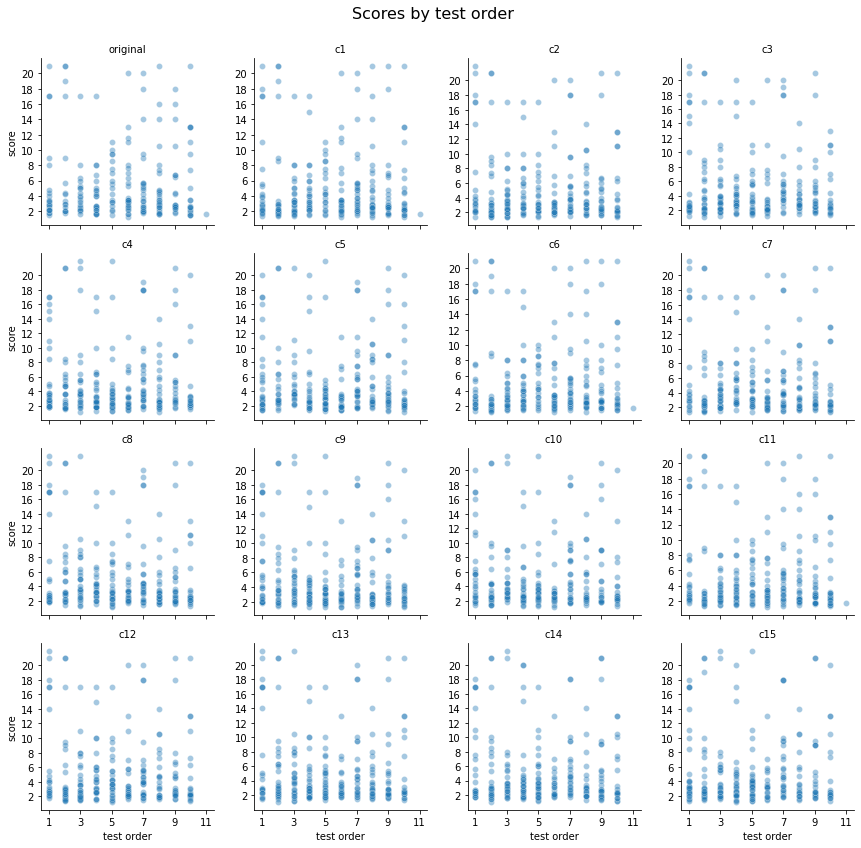

In [142]:
# Create a FacetGrid
g = sns.FacetGrid(ranked_df_filtered, col = 'combination', col_wrap = 4, sharey = False)
g.map_dataframe(sns.scatterplot, x = 'test order', y = 'score', alpha = .4)

# Add labels and titles
g.set_axis_labels('test order', 'score')
g.set_titles(col_template = '{col_name}')
g.fig.subplots_adjust(top = 0.92)
g.fig.subplots_adjust(bottom = 0.05)
g.fig.suptitle('Scores by test order', fontsize = 16)

# Set ticks
g.set(xticks = [1, 3, 5, 7, 9, 11], yticks = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20])

plt.savefig('../alternate_test/results/scores_and_orders.png', dpi = 150)

# Show plot
plt.show()

# Test order distribution

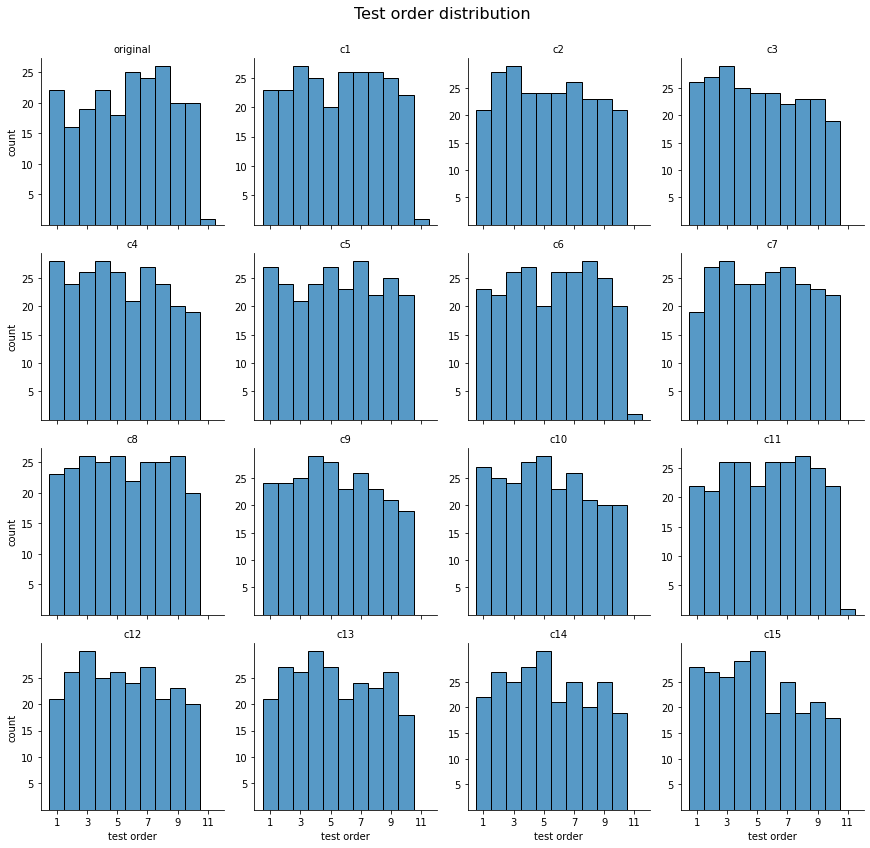

In [143]:
# Create a FacetGrid
g = sns.FacetGrid(ranked_df_filtered, col = 'combination', col_wrap = 4, sharey = False)
g.map_dataframe(sns.histplot, x = 'test order', bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], discrete = True)

# Add labels and titles
g.set_axis_labels('test order', 'count')
g.set_titles(col_template = '{col_name}')
g.fig.subplots_adjust(top = 0.92)
g.fig.subplots_adjust(bottom = 0.05)
g.fig.suptitle('Test order distribution', fontsize = 16)

# Set ticks
g.set(xticks = [1, 3, 5, 7, 9, 11], yticks = [5, 10, 15, 20, 25])

plt.savefig('../alternate_test/results/test_order_distribution.png', dpi = 150)

# Show plot
plt.show()

# Mean, median and mode

In [144]:
mean_median_mode_df = ranked_df_filtered.groupby('combination')['test order'].agg(['mean', 'median', mode])

In [145]:
combination_order = ['original', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6',
                     'c7', 'c8', 'c9', 'c10', 'c11', 'c12', 'c13',
                     'c14', 'c15']

In [146]:
mean_median_mode_df = mean_median_mode_df.reindex(combination_order)
mean_median_mode_df

,mean,median,mode
combination,,,
original,5.661972,6.0,8
c1,5.540984,6.0,3
c2,5.378601,5.0,3
c3,5.231405,5.0,3
c4,5.238683,5.0,1
c5,5.448560,5.0,7
c6,5.536885,6.0,8
c7,5.479508,5.5,3
c8,5.454545,5.0,3


In [147]:
# Export mean, median and mode per combination

mean_median_mode_df.to_csv('../alternate_test/results/mean_median_mode_test_scores.csv', index = True)